In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
import os
os.chdir(r'C:\Users\Asus\Desktop\Data Science Master Program\004 ML Practise\datasets')
#os.chdir(r'C:\Users\Asus\Desktop\Data Science Master Program\004 ML Practise\Data Scientist Test\Example_Data_for_Data_Scientist_Position')

In [3]:
df0 = pd.read_excel('combined_cycle_powerplant.xlsx')
df0.head(20)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [6]:
df0.isna().sum().sum()

0

In [14]:
X = df0.iloc[:, 0:4]
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [15]:
y = df0.iloc[:, -1:]
y.head()

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90


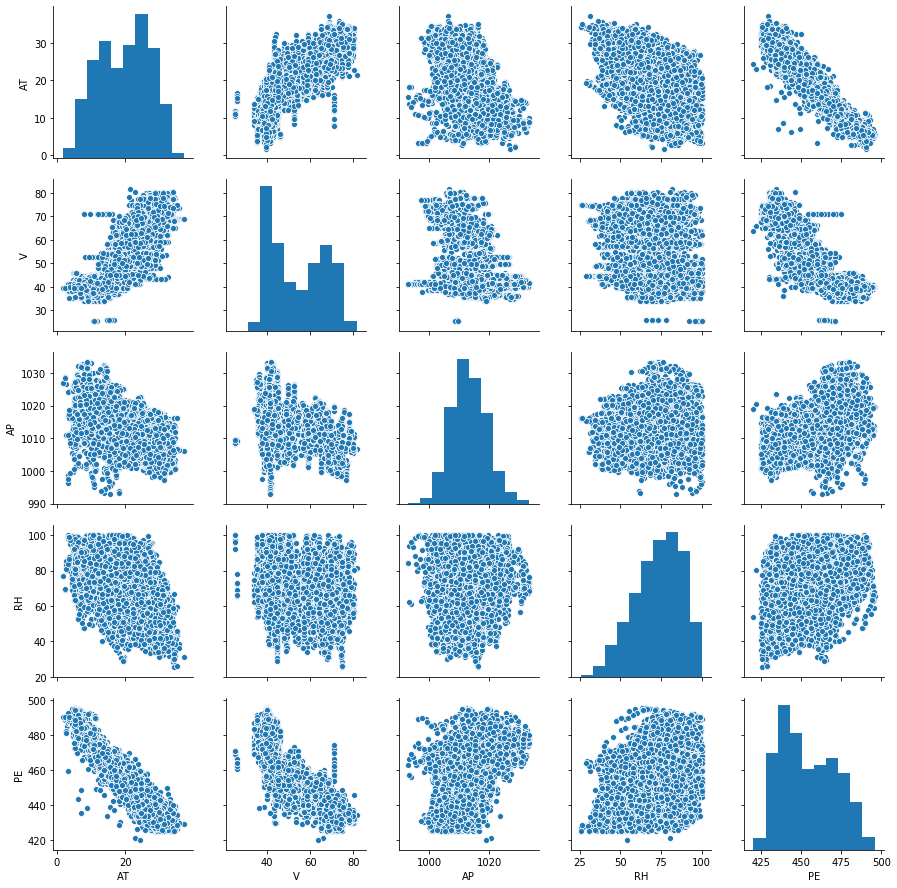

In [26]:
import seaborn as sns
sns.pairplot(df0)

In [16]:
multi_linr_reg = LinearRegression()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
print('X_train: ', len(X_train))
print('X_test: ', len(X_test))
print('y_train: ', len(y_train))
print('y_test: ', len(y_test))

X_train:  7654
X_test:  1914
y_train:  7654
y_test:  1914


In [29]:
multi_linr_reg.fit(X_train, y_train)

LinearRegression()

In [31]:
pd.DataFrame(multi_linr_reg.coef_)

,0,1,2,3
0,-1.975965,-0.236379,0.050965,-0.161455


In [32]:
pd.DataFrame(multi_linr_reg.intercept_)

,0
0,466.226072


In [34]:
y_pred = multi_linr_reg.predict(X_test)

In [42]:
print(y_pred)

[[437.32505884]
 [468.18673953]
 [462.62058982]
 ...
 [435.29517915]
 [467.01084501]
 [472.69298621]]


In [43]:
multi_linr_reg.predict([[14.96, 41.76, 1024.07,73.17]])

array([[467.17266541]])

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9269759584843926

In [36]:
import statsmodels.api as sm

In [37]:
regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()

In [38]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.552e+07
Date:                Sat, 20 Mar 2021   Prob (F-statistic):                        0.00
Time:                        21:20:03   Log-Likelihood:                         -23253.
No. Observations:                7654   AIC:                                  4.651e+04
Df Residuals:                    7650   BIC:                                  4.654e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.6668      0.017    -96.990      0.000      -1.701      -1.633
V             -0.2763      0.009    -30.674      0.000      -0.294      -0.259
AP             0.5029      0.000   1086.631      0.000       0.502       0.504
RH            -0.1023      0.005    -20.889      0.000      -0.112      -0.093
==============================================================================
Omnibus:                      499.245   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1681.553
Skew:                          -0.282   Prob(JB):                         0.00
Kurtosis:                       5.226   Cond. No.                         337.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Actual v/s Predicted')

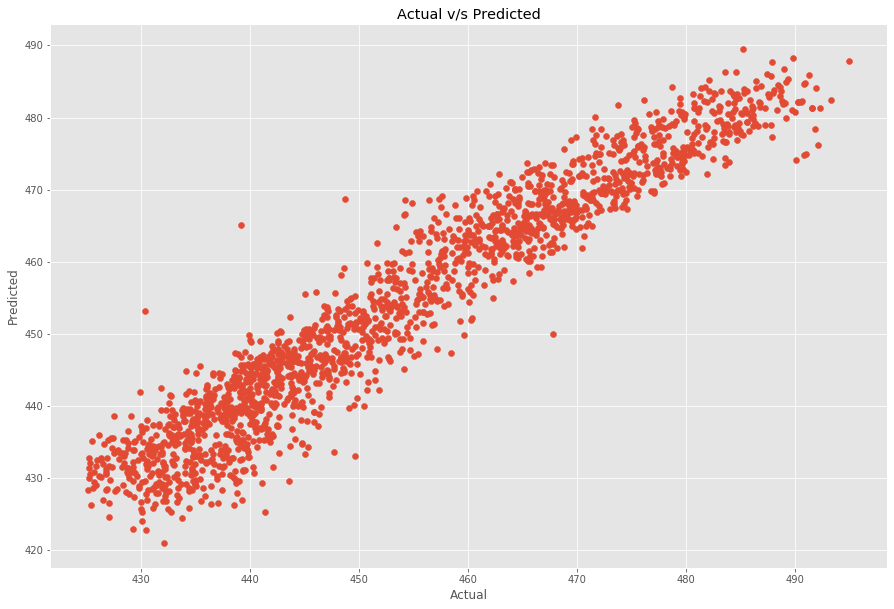

In [45]:
plt.figure(figsize = (15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual v/s Predicted')

In [107]:
Actual = pd.DataFrame(y_test)

In [96]:
Actual.rename(columns = {'y':'Actual'}, inplace = True)

In [98]:
Predicted = pd.DataFrame(y_pred)

In [101]:
Predicted.rename(columns = {0:'Predicted'}, inplace=True)

In [111]:
pd.concat([Actual, Predicted], axis = 1)

,Actual,Predicted
0,NaN,437.325059
1,NaN,468.186740
2,NaN,462.620590
3,NaN,435.308537
4,NaN,430.397861
...,...,...
9555,439.59,NaN
9556,433.97,NaN
9557,451.06,NaN
9558,445.30,NaN


In [62]:
print(y_test - y_pred)

            PE
1453 -4.835059
2587 -3.876740
5689  4.949410
8478  3.421463
6923  4.222139
...        ...
7440  2.836458
2473  8.580970
2822 -2.315179
7353 -3.130845
48    1.907014

[1914 rows x 1 columns]


In [39]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

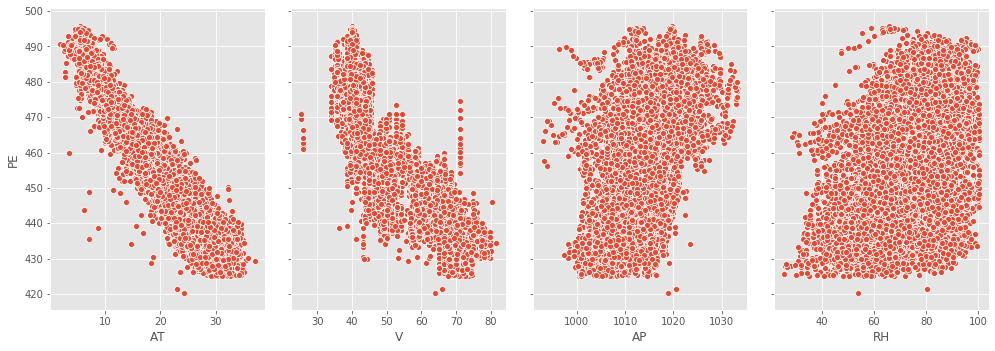

In [40]:
sns.pairplot(df0, x_vars = ['AT', 'V', 'AP','RH'], y_vars = 'PE', height = 5, aspect = 0.7)

In [17]:
multi_linr_reg.fit(X, y)

LinearRegression()

In [20]:
r_square = multi_linr_reg.score(X, y)
r_square * 100

92.86960898122535

In [19]:
1 / (1 - r_square)

14.024476320680803

In [21]:
import statsmodels.api as sm
from pandas import DataFrame, Series
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [24]:
calc_vif(X)

,variables,VIF
0,AT,39.157705
1,V,74.969127
2,AP,66.618618
3,RH,40.704756
